In [2]:
import os
import keras

import numpy as np

from keras import models, layers
from keras import optimizers
from keras.datasets import imdb

Using TensorFlow backend.


In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path=os.getcwd()+'/imdb.npz', num_words=10000)

In [13]:
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [21]:
def vectorize(seqs, dim=10000):
    ret = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        ret[i, seq] = 1
    return ret

x_train = vectorize(train_data)
x_test = vectorize(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0])
print(y_train[0])

(25000, 10000)
(25000,)
[0. 1. 1. ... 0. 0. 0.]
1.0


In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


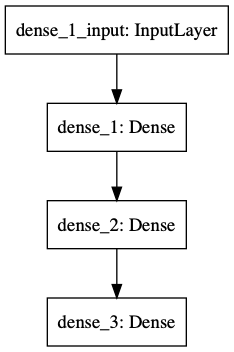

In [16]:
keras.utils.plot_model(model, to_file='imdb.png')

In [17]:
batch_size = 128
num_classes = 10
epochs = 20

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.3917 - acc: 0.8422 - val_loss: 0.2998 - val_acc: 0.8818
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2117 - acc: 0.9233 - val_loss: 0.2874 - val_acc: 0.8859
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1549 - acc: 0.9430 - val_loss: 0.3091 - val_acc: 0.8823
Epoch 4/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1173 - acc: 0.9575 - val_loss: 0.3423 - val_acc: 0.8796
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.0908 - acc: 0.9689 - val_loss: 0.3733 - val_acc: 0.8765
Epoch 6/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.0705 - acc: 0.9765 - val_loss: 0.4250 - val_acc: 0.8729
Epoch 7/20
15000/15000 [==============================] - 1s 86us/step - loss:

In [23]:
print(history.history.keys())
history_dict = history.history

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [21]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

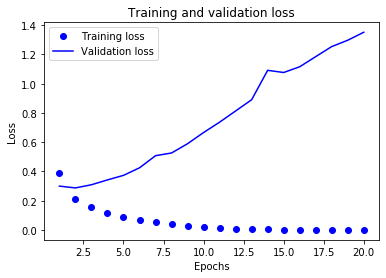

In [22]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

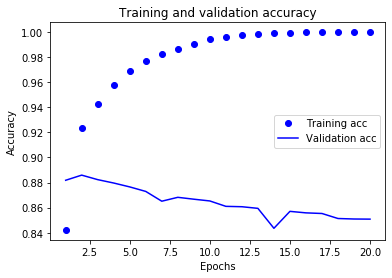

In [24]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
model.save('imdb.h5')